In [147]:
from sklearn.preprocessing import StandardScaler
#from factor_analyzer import FactorAnalyzer, calculate_kmo
from scipy.stats import bartlett
import pandas as pd
from sklearn.preprocessing import StandardScaler
#from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pingouin as pg
import seaborn as sns

In [148]:
data_path = "data_cleaned_feature_31.csv"
data = pd.read_csv(data_path)
print(data.columns)
data.shape

Index(['video_id', 'video_published_at', 'video_trending__date',
       'video_trending_country', 'channel_id', 'video_title',
       'video_description', 'video_default_thumbnail', 'video_category_id',
       'video_tags', 'video_duration', 'video_dimension', 'video_definition',
       'video_licensed_content', 'video_view_count', 'video_like_count',
       'video_comment_count', 'channel_title', 'channel_description',
       'channel_custom_url', 'channel_published_at', 'channel_country',
       'channel_view_count', 'channel_subscriber_count',
       'channel_have_hidden_subscribers', 'channel_video_count',
       'channel_localized_title', 'channel_localized_description',
       'engagement_rate', 'time_difference', 'video_duration_seconds'],
      dtype='object')


(149885, 31)

In [149]:
data = data.drop(['video_trending_country'],axis=1).drop_duplicates()
data.shape

(114683, 30)

In [150]:
data.select_dtypes(include=['int64', 'float64'])

,video_view_count,video_like_count,video_comment_count,channel_view_count,channel_subscriber_count,channel_video_count,engagement_rate,video_duration_seconds
0,156272.0,4615.0,238.0,46473647,321000,207,0.031055,774.0
1,2148646.0,222346.0,11225.0,6395292,158000,61,0.108706,317.0
2,1106491.0,44317.0,2406.0,2807917957,8880000,1612,0.042226,2223.0
3,1185486.0,25373.0,2664.0,122939495,389000,635,0.023650,1297.0
4,69035.0,4346.0,125.0,85074466,436000,1429,0.064764,1269.0
...,...,...,...,...,...,...,...,...
149880,8548359.0,378107.0,3089.0,5592638348,12500000,1019,0.044593,24.0
149881,22553412.0,623924.0,7208.0,6331232520,8890000,480,0.027984,15.0
149882,63090147.0,2451904.0,3598.0,33506017412,44400000,3136,0.038921,15.0
149883,765386.0,27876.0,716.0,42201127,379000,809,0.037356,6566.0


In [151]:
duplicate_summary = {
    "Total Rows": len(data),
    "Duplicate Rows (Entire Row)": data.duplicated().sum(),
    "Duplicate Video IDs": data.duplicated(subset=['video_id']).sum()
}
duplicate_summary 

{'Total Rows': 114683,
 'Duplicate Rows (Entire Row)': 0,
 'Duplicate Video IDs': 96373}

In [152]:
data.shape

(114683, 30)

In [153]:
data = data.drop_duplicates(subset=['video_id'])
data.shape

(18310, 30)

In [154]:
# text_features = ['video_description', 'video_title']

# def clean_text_column(column):
#     """Clean a text column by filling nulls and removing special characters."""
#     return (
#         column.fillna("")  # Fill missing values with empty string
#         .str.replace(r"[^\w\s]", " ", regex=True)  # Remove special characters
#         .str.lower()  # Convert to lowercase
#         .str.strip()  # Remove leading/trailing spaces
#     )

# for text_feature in text_features:
#     data[text_feature] = clean_text_column(data[text_feature])

In [155]:
# from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('all-MiniLM-L6-v2')
# sentence_embeddings = {}
# for text_feature in text_features:
#     text_data = data[text_feature].tolist()
#     embeddings = model.encode(text_data, show_progress_bar=True)
#     sentence_embeddings[text_feature] = pd.DataFrame(
#         embeddings, 
#         columns=[f"{text_feature}_dim{i}" for i in range(embeddings.shape[1])]
#     )

In [156]:
def time_to_seconds(time_str):
    days, time_part = time_str.split(" days ")
    days = int(days)
    h, m, s = map(int, time_part.split(":"))
    total_seconds = days * 86400 + h * 3600 + m * 60 + s
    return total_seconds

data['time_to_trend_difference_seconds'] = data['time_difference'].apply(time_to_seconds)
data['likes_per_view'] = data['video_like_count'] / data['video_view_count']
data['comments_per_view'] = data['video_comment_count'] / data['video_view_count']
data['is_weekend'] = pd.to_datetime(data['video_published_at']).dt.weekday >= 5

In [157]:
# columns_for_fa = [ 'video_view_count', 'video_like_count', 'video_comment_count',
#     'channel_view_count', 
#     'channel_video_count', 'time_to_trend_difference_seconds',
#     'video_duration_seconds']
# fa_data = data[columns_for_fa].apply(pd.to_numeric, errors='coerce').dropna()
# scaler = StandardScaler()
# factor_data_standardized = scaler.fit_transform(fa_data)
# kmo_all, kmo_model = calculate_kmo(factor_data_standardized)
# print(f"KMO: {kmo_model}")
# chi_square_value, p_value = calculate_bartlett_sphericity(factor_data_standardized)
# print(f"Bartlett's Test - Chi-Square: {chi_square_value}, p-value: {p_value}")
# fa = FactorAnalyzer(n_factors=3, rotation='varimax') 
# fa.fit(factor_data_standardized)
# eigenvalues, _ = fa.get_eigenvalues()
# print(f"Eigenvalues: {eigenvalues}")
# loadings = fa.loadings_
# print(f"Factor Loadings:\n{loadings}")

In [158]:
# factor_loadings = fa.loadings_
# factor_loadings

# threshold = 0.4
# strong_loadings = np.abs(factor_loadings) > threshold

# for i in range(factor_loadings.shape[1]):  
#     print(f"Factor {i+1} includes variables: {np.where(strong_loadings[:, i])[0]}")

In [159]:
# alpha1, ci1 = pg.cronbach_alpha(pd.DataFrame(factor_data_standardized).iloc[:, [0, 1,2]])
# print(f"Factor 1 - Cronbach's Alpha: {alpha1}, 95% CI: {ci1}")

In [160]:
# import seaborn as sns
# factor_loadings_df = pd.DataFrame(loadings, columns=['Factor 1', 'Factor 2', 'Factor 3'], index=columns_for_fa)
# sns.heatmap(factor_loadings_df, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Factor Loadings')
# plt.show()

In [161]:
data['is_trending'] = data['time_difference'].apply(
    lambda x: 1 if int(x.split(" ")[0]) <= 1 else 0 
)
data.is_trending.value_counts() ## checking how fast videos are trending

is_trending
0    14594
1     3716
Name: count, dtype: int64

In [162]:
# do split (" ") and take the first element

data["time_difference_days"] = data["time_difference"].apply(lambda x: int(x.split(" ")[0]))
data["time_difference_days"]

0          5
1         26
2          3
3          3
4          3
          ..
149685     1
149704    13
149725     7
149737     1
149822    14
Name: time_difference_days, Length: 18310, dtype: int64

In [163]:
data.shape

(18310, 36)

In [164]:
# # hstack embedded_text and data
# data = pd.concat([data, embedded_text], axis=1)
# data.shape

In [165]:
data.engagement_rate.unique()

array([0.03105483, 0.10870613, 0.04222628, ..., 0.01327402, 0.03468068,
       0.0573489 ])

In [166]:
# majority_class = data[data['is_trending'] == 0]
# minority_class = data[data['is_trending'] == 1]
# # shape
# majority_class.shape, minority_class.shape

In [167]:
# from sklearn.utils import resample


# minority_upsampled = resample(minority_class, 
#                               replace=True,     
#                               n_samples=int(round(len(majority_class) * 0.7, -2)),  
#                               random_state=42)  

# data = pd.concat([majority_class, minority_upsampled])
# data.is_trending.value_counts()

In [168]:
# pd.concat([majority_class, minority_upsampled]).shape

In [169]:
data['channel_published_at'] = pd.to_datetime(data['channel_published_at'], errors='coerce').dt.tz_localize(None)
data['video_published_at'] = pd.to_datetime(data['video_published_at'], errors='coerce').dt.tz_localize(None)
data['channel_video_channel_publish_difference'] = (data['video_published_at'] - data['channel_published_at']).dt.days
data['channel_video_channel_publish_difference']

0         2939.0
1            NaN
2         3423.0
3            NaN
4            NaN
           ...  
149685    2440.0
149704    3171.0
149725    4042.0
149737       NaN
149822    3919.0
Name: channel_video_channel_publish_difference, Length: 18310, dtype: float64

In [170]:
data['channel_video_channel_publish_difference'] = data['channel_video_channel_publish_difference'].fillna(data['channel_video_channel_publish_difference'].mean()) # di ko na alam kung tama to

In [171]:
data['is_trending'].value_counts()

is_trending
0    14594
1     3716
Name: count, dtype: int64

In [172]:
data['is_weekend'].value_counts()

is_weekend
False    12946
True      5364
Name: count, dtype: int64

In [173]:
# features = [
#     'video_duration_seconds', 'channel_video_count',
#     'video_category_id', 'video_trending_country', 'is_weekend',
#     'video_definition', 'video_dimension', 'video_licensed_content',
#     'channel_country', 'channel_have_hidden_subscribers','channel_video_channel_publish_difference'
# ]


In [174]:
data.channel_have_hidden_subscribers

0         False
1         False
2         False
3         False
4         False
          ...  
149685    False
149704    False
149725    False
149737    False
149822    False
Name: channel_have_hidden_subscribers, Length: 18310, dtype: bool

In [175]:
# data['is_trending'] = data['time_difference'].apply(
#     lambda x: 1 if int(x.split(" ")[0]) <= 3 else 0
# )

In [176]:
text_features = ['video_description', 'video_title']

def clean_text_column(column):
    """Clean a text column by filling nulls and removing special characters."""
    return (
        column.fillna("")  # Fill missing values with empty string
        .str.replace(r"[^\w\s]", " ", regex=True)  # Remove special characters
        .str.lower()  # Convert to lowercase
        .str.strip()  # Remove leading/trailing spaces
    )

for text_feature in text_features:
    data[text_feature] = clean_text_column(data[text_feature])

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
sentence_embeddings = {}
for text_feature in text_features:
    text_data = data[text_feature].tolist()
    embeddings = model.encode(text_data, show_progress_bar=True)
    sentence_embeddings[text_feature] = pd.DataFrame(
        embeddings, 
        columns=[f"{text_feature}_dim{i}" for i in range(embeddings.shape[1])]
    )

embedded_text = pd.concat(sentence_embeddings.values(), axis=1)

Batches:   0%|          | 0/573 [00:00<?, ?it/s]

Batches:   0%|          | 0/573 [00:00<?, ?it/s]

In [189]:
data = pd.concat([data.reset_index(), embedded_text], axis=1)
data.shape

(18310, 806)

In [190]:
embedded_text_columns = embedded_text.columns.tolist()
len(embedded_text_columns)

768

In [191]:
categorical_features = [
    'video_category_id', 'is_weekend',
    'video_definition', 'video_dimension', 'video_licensed_content',
    'channel_country', 'channel_have_hidden_subscribers'
]
numerical_features = [
    'video_duration_seconds', 'channel_video_count', 'channel_video_channel_publish_difference'
]

In [192]:
X_categorical = data[categorical_features]
X_numerical = data[numerical_features]
X_text = data[embedded_text_columns]
y = data['engagement_rate']

In [194]:
X_categorical.shape

(18310, 7)

In [195]:
X_numerical.shape

(18310, 3)

In [196]:
import numpy as np
X = pd.concat((X_numerical, X_categorical, X_text),axis=1)
X.shape

(18310, 778)

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [198]:
X_train

,video_duration_seconds,channel_video_count,channel_video_channel_publish_difference,video_category_id,is_weekend,video_definition,video_dimension,video_licensed_content,channel_country,channel_have_hidden_subscribers,...,video_title_dim374,video_title_dim375,video_title_dim376,video_title_dim377,video_title_dim378,video_title_dim379,video_title_dim380,video_title_dim381,video_title_dim382,video_title_dim383
10264,487.0,936,3878.121553,Science & Technology,False,hd,2d,True,United States,False,...,0.039261,0.002876,-0.067118,0.039997,-0.030495,-0.003761,0.044838,0.010311,0.015545,0.067037
8114,748.0,844,4563.000000,Education,False,hd,2d,True,Germany,False,...,0.033493,-0.050844,0.005471,0.058531,-0.075809,0.070728,0.037826,0.019287,-0.011648,-0.020003
15984,59.0,3165,6152.000000,News & Politics,False,hd,2d,True,Italy,False,...,0.022281,-0.101378,0.064327,0.030213,0.003270,-0.005103,-0.029635,0.048736,0.038847,-0.058433
5181,58.0,1674,2817.000000,Entertainment,False,hd,2d,True,Brazil,False,...,0.043455,0.018028,-0.049987,0.077757,-0.029774,0.049609,0.064199,0.051374,-0.037515,-0.058000
9657,1770.0,381,3878.121553,People & Blogs,False,hd,2d,True,Indonesia,False,...,0.001505,-0.026050,-0.000867,0.055327,-0.092131,0.033613,0.104298,0.030238,0.010395,-0.042445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,933.0,939,2472.000000,Entertainment,False,hd,2d,True,Japan,False,...,-0.029220,0.081392,0.024048,0.038235,0.033520,0.016209,-0.018309,0.047248,-0.015575,-0.025135
11964,1237.0,984,4411.000000,Sports,False,hd,2d,True,Spain,False,...,0.098161,0.023039,0.039445,0.060952,-0.074366,-0.014194,-0.025621,-0.014073,0.037163,-0.053636
5390,4383.0,352,3946.000000,Entertainment,False,hd,2d,True,France,False,...,-0.002605,-0.004779,0.038738,-0.014561,0.016958,0.059930,0.066011,-0.001092,-0.082906,-0.065520
860,174.0,221,4040.000000,Music,False,hd,2d,True,United States,False,...,0.050205,-0.019282,0.036674,0.013587,-0.034370,-0.021249,0.077918,-0.018086,0.065192,0.031782


In [199]:
X_train_categorical = X_train[categorical_features]
X_test_categorical = X_test[categorical_features]

X_train_numerical = X_train[numerical_features]
X_test_numerical = X_test[numerical_features]

X_train_text = X_train[embedded_text_columns]
X_test_text = X_test[embedded_text_columns]

In [200]:
y_train

10264    0.022798
8114     0.064706
15984    0.041621
5181     0.043040
9657     0.020947
           ...   
11284    0.055916
11964    0.039799
5390     0.076676
860      0.069029
15795    0.025257
Name: engagement_rate, Length: 12817, dtype: float64

In [201]:
from feature_engine.encoding import DecisionTreeEncoder
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import MeanEncoder

encoder = DecisionTreeEncoder(random_state=42)
X_train_encode = encoder.fit_transform(X_train_categorical, y_train)
X_test_encode = encoder.transform(X_test_categorical)

In [202]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)
# X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

In [203]:
X_train = np.hstack((X_train_encode, X_train_scaled, X_train_text))
X_test = np.hstack((X_test_encode, X_test_scaled, X_test_text))

In [204]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

regressor = RandomForestRegressor(random_state=42)

regressor.fit(X_train, y_train)

y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")

Train MSE: 8.343068169968884e-05
Test MSE: 0.0005972291425249223
Train R2: 0.9036451263495532
Test R2: 0.3221540563688646


In [206]:
feature_importances = regressor.feature_importances_

In [211]:
feature_names = pd.concat([data[categorical_features],data[numerical_features],data[embedded_text_columns]]).columns
feature_importances = regressor.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

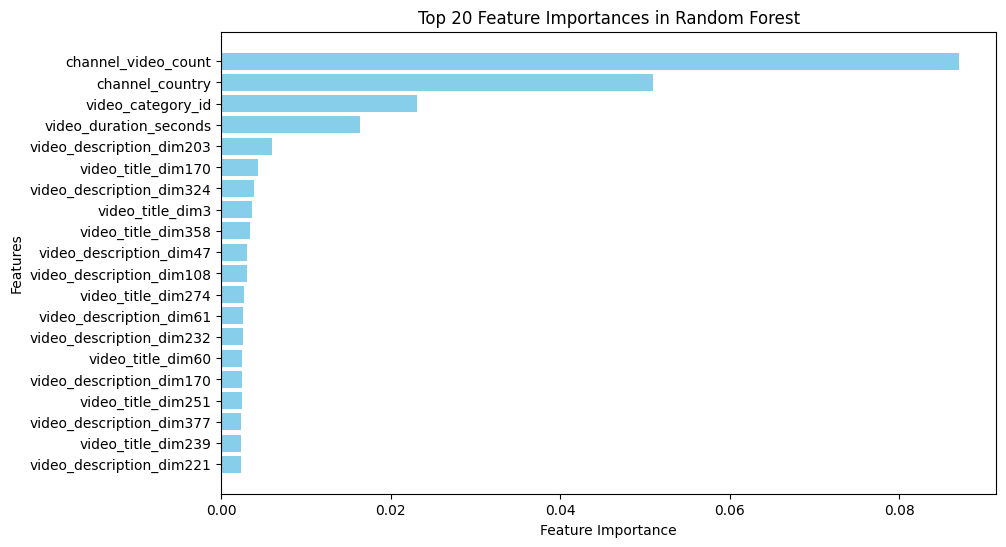

In [212]:
top_features = importance_df.head(20)
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances in Random Forest')
plt.gca().invert_yaxis()  
plt.show()

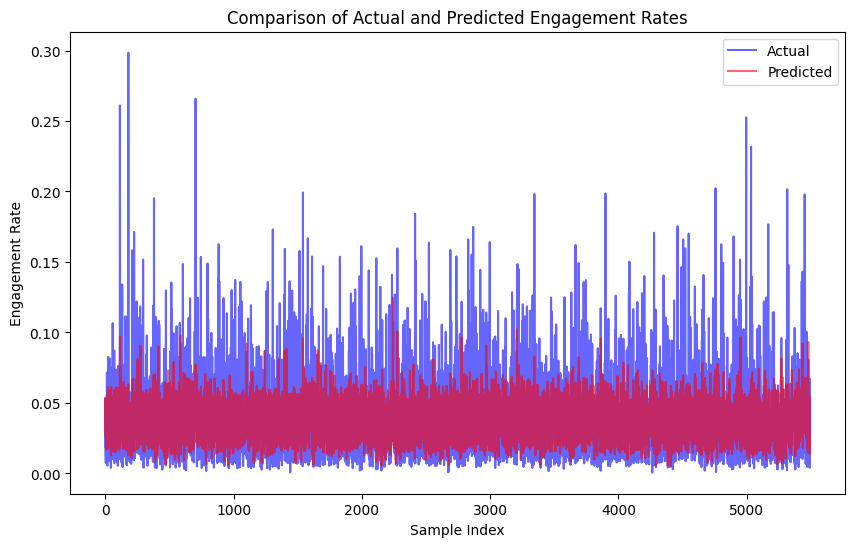

In [208]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue', alpha=0.6)
plt.plot(y_pred_test, label='Predicted', color='red', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Engagement Rate')
plt.title('Comparison of Actual and Predicted Engagement Rates')
plt.legend()
plt.show()

In [213]:
importance_df['Prefix'] = importance_df['Feature'].str.extract(r'(video_description|video_title)')

In [214]:
aggregated_importance = importance_df.groupby('Prefix')['Importance'].sum().reset_index()

aggregated_importance.columns = ['Feature', 'Importance']

In [225]:
combined_features = pd.concat([top_features, aggregated_importance], ignore_index=True)

In [226]:
combined_features

,Feature,Importance
0,channel_video_count,0.087109
1,channel_country,0.050904
2,video_category_id,0.023101
3,video_duration_seconds,0.016340
4,video_description_dim203,0.005932
5,video_title_dim170,0.004280
6,video_description_dim324,0.003860
7,video_title_dim3,0.003635
8,video_title_dim358,0.003429
9,video_description_dim47,0.003065


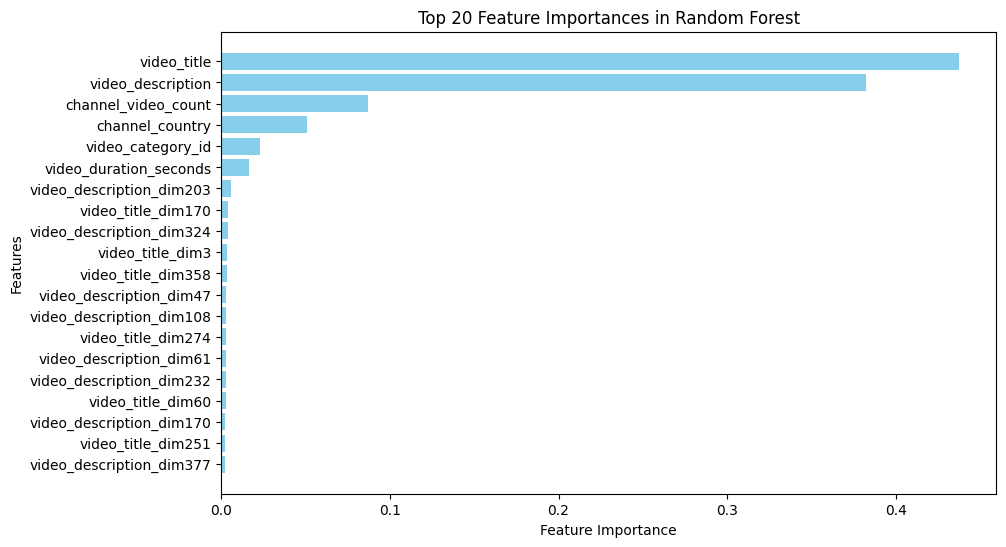

In [227]:
combined_features = combined_features.sort_values(by='Importance', ascending=False).head(20)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(combined_features['Feature'], combined_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances in Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()